## BASIC IMPORTS

In [1]:
from TBAC  import StockScrub, VIX_update, process_text                      #This line tells python to import the class.
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np                     
from dotenv import load_dotenv 
%matplotlib inline
#!pip install --upgrade newspaper3k 
#!pip install --upgrade GoogleNews
from GoogleNews import GoogleNews
from newspaper import Article
from datetime import datetime
import numpy as np
from pathlib import Path
import Generic_Parser_Mod
import seaborn
import hvplot.pandas                                                              #for hvplots
seaborn.set_style('darkgrid', {'legend.frameon':True})

 ...Loading Master Dictionary 85000
Master Dictionary loaded from file: 
  LoughranMcDonald_MasterDictionary_2018.csv
  86,486 words loaded in master_dictionary.



### Creating Objects of the StockScrub Class

In [2]:
senti_scores=['% positive', '% negative','% uncertainty', '% litigious', '% modal-weak','% modal moderate','% modal strong', '% constraining']
stock_market_measures=['close','volume','VIX','beta']
zoom=StockScrub(['ZM'])

### Pulls in most recent available data AlphaVantage API for a single ticker representing permitted stock or cryptocurrency

In [22]:
apple.get_data()

Data successfully stored.


### Pulls in most recent available data on VIX indicator from Quandl API to be used for analysis

In [4]:
#VIX_update()

Data successfully stored.


# Getting Sentiment for Specified Stock, Using Loughran McDonald Dictionary
### *(Don't have articles for each day,presents a challenge for gathering sentiment. Either improve search query or consider all sources and remove days that don't have news)*
### -Takes news from GoogleNews API, combines news on same day and removes duplicated days
### -tokenizes content for sentiment computation
### -The contents column will be the column that contains the sentiment scores

In [9]:
df=btc.get_sentiment(start='2016-01-01',end='2021-01-08')

###  Gathering Data for a Specific Company and Time Range: Use Default Time Range or Specify Date. NAs rows incurred from beta computations are removed

In [11]:
AAPL_df=zoom.data_compile(start='2016-01-01')
AAPL_df.head()
AAPL_df[senti_scores].hvplot.line(legend=True,width=1000,height=400,line_width=4,grid=True,title="Sentiments Scores for Zoom Using Loughran and McDonald Dictionary")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fafbb1467d0>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

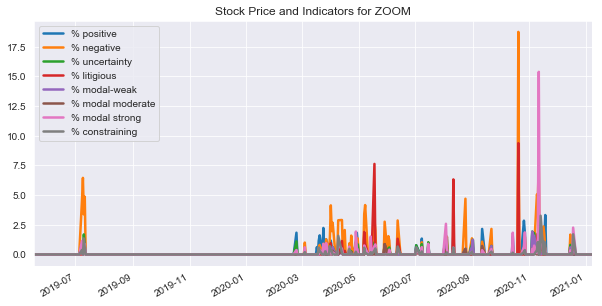

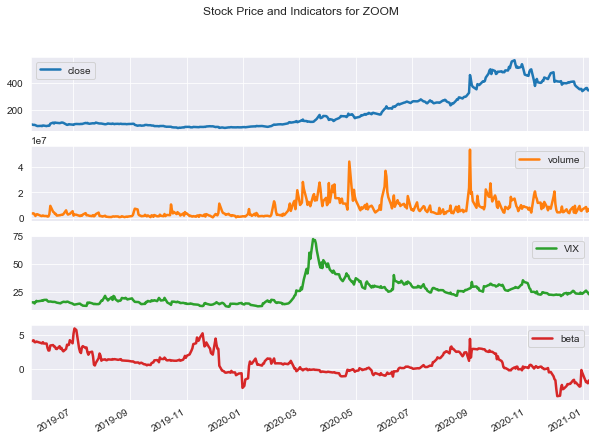

In [10]:
#fig=plt.figure()
#AAPL_df[senti_scores].plot(figsize=(30,5))
fig=plt.figure()
AAPL_df[senti_scores].plot(subplots=False,figsize=(10,5),title="Stock Price and Indicators for ZOOM",linewidth=2.5)
AAPL_df[stock_market_measures].plot(subplots=True,figsize=(10,7),title="Stock Price and Indicators for ZOOM",linewidth=2.5)




In [13]:
aapl=StockScrub(['AAPL'])
aapl_df=pfe.data_compile(start='2016-01-01')
aapl_df.head()

,close,volume,VIX,beta,number of words,% positive,% negative,% uncertainty,% litigious,% modal-weak,% modal moderate,% modal strong,% constraining,average word length,vocabulary
2016-02-02,23.696730,48209098.0,23.15,0.472439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-03,23.563072,44972994.0,22.75,0.452962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-04,23.030977,56929892.0,23.05,0.411037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-05,23.054802,38931372.0,24.12,0.395585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-08,22.681542,47513120.0,25.40,0.406758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plotting Time Series of Closing Prices for Specific Company

<AxesSubplot:title={'center':'Closing Prices of BTC: USD Market'}, xlabel='date'>

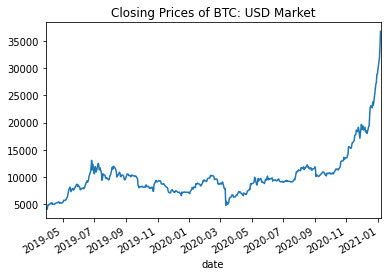

In [17]:
BTC_df['close'].plot(title='Closing Prices of BTC: USD Market')

### Function Calls Close Price and select indicator values of stock. Additional Indicators can be built into the class

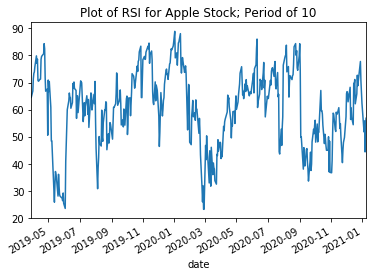

In [8]:
df.RSI.plot(title="Plot of RSI for Apple Stock; Period of 10")

### Modifications to Sentiment Code (In progress)

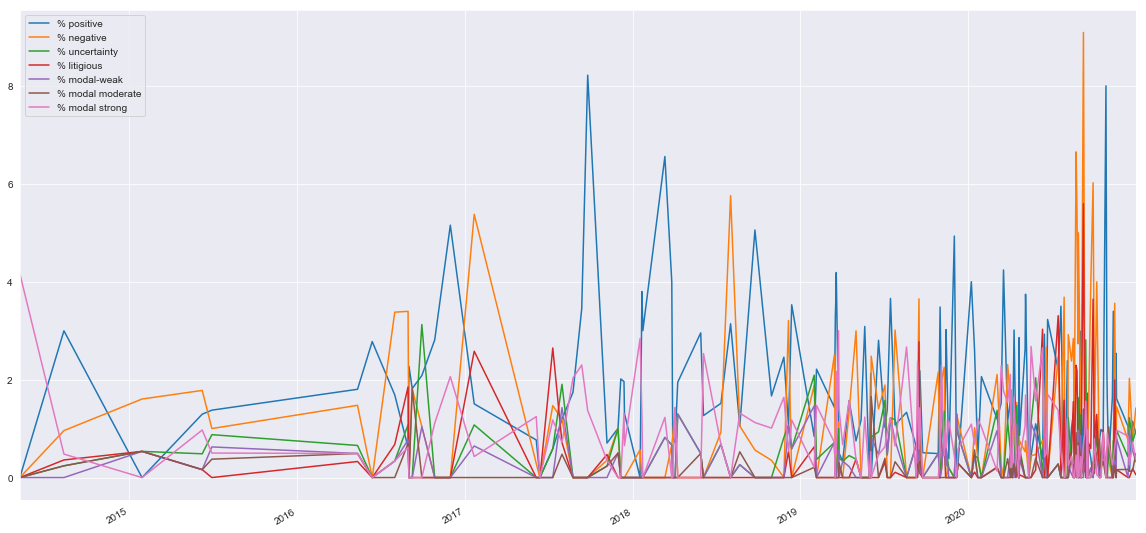

In [27]:
#df=pd.read_csv("Sentiment_Data/AAPL_scores.csv",index_col=[0],parse_dates=True,infer_datetime_format=True)
#df
p=df[["% positive","% negative", "% uncertainty","% litigious","% modal-weak",
    "% modal moderate","% modal strong"]].plot(kind='line',use_index=True,figsize=(20,10))
#axhline.plot()

In [14]:
p=df[list(df.columns)[1:-2]].hvplot(legend=True,width=1000,height=400)
#title="Sentiment Analysis for AAPL using Loughran-McDonald Master Dictionary "
#p1=pd.DataFrame({'date':df.index, '%':[6]*len(df)})
#p2=p1.hvplot()
#p=L['% negative'].plot(kind='bar')
#p=L['% uncertainty'].plot(kind='bar')
#p.axhline(y = 5, color = 'black', linestyle = '--') 
#p.legend(['% positive', '% negative',                   # columns that we want to be in the DataFrame of sentiment scores (12 total)
#                '% uncertainty', '% litigious', '% modal-weak','% modal moderate',
#                '% modal strong', '% constraining'])
#list(df.columns)[1:-2]
p

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
L[['% positive', '% negative',                                                             # columns that we want to be in the DataFrame of sentiment scores (12 total)
'% uncertainty', '% litigious', '% modal-weak','% modal moderate',
'% modal strong', '% constraining']].hvplot.bar(
                 stacked=True, rot=90, width=800, height=, legend='top_left')

### Getting Average Beta Values for Specific Stock over a specified period; the default period is 15

In [16]:
beta_df=apple.get_beta(start='2018-01-01')
beta_df['2020'].head()

,beta
Date,
2020-01-02,0.763006
2020-01-03,1.056594
2020-01-06,1.346584
2020-01-07,1.474921
2020-01-08,1.478893
